# Policy-Based RL

policy-based将目光落在动作的实际作用而非估计上。因此，其输出不是action的value，而是具体哪一个action。
其优点在于输出的action可以是连续的。

只依靠策略的强化学习算法在复杂环境的表现较差，目前一般与value-based方法一同使用，即Actor-Critic。

In [15]:
import gym
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
env = gym.make('CartPole-v0')
env = env.unwrapped
A_DIM = env.action_space.n
S_DIM = env.observation_space.shape[0]
print(' State Dimensions : ', S_DIM)
print(' Action Dimensions : ', A_DIM)

 State Dimensions :  4
 Action Dimensions :  2


In [17]:
EPOCHS = 700
MAX_STEPS=2000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [18]:
def move_avg(a,n=100,mode="valid"):	# 滑动平均
    return(np.convolve(a, np.ones((n,))/n, mode=mode))	
    
def plot_G(model_name, rew): 
    plt.figure(figsize=[15, 6])
    
    plt.subplot(1,2,1)
    X = np.linspace(1,len(rew),len(rew))
    plt.plot(X, rew)
    plt.xlabel('epochs')
    plt.title(model_name)

    plt.subplot(1,2,2)
    rew = move_avg(rew)
    X = np.linspace(1,len(rew),len(rew))
    plt.plot(X, rew)
    plt.xlabel('epochs')
    plt.title(model_name+'(avg)')
    plt.show()

In [19]:
%run policygradient.py

In [20]:
from policygradient import PolicyGradient

agent = PolicyGradient(A_DIM)

In [21]:
loss_total = list()
rew = list()
for epoch in range(EPOCHS):
    obs = env.reset()
    done = False

    for t in range(MAX_STEPS):
        if epoch > 300:
            env.render()
        action = agent.choose_action(obs)
        obs_next, reward, done, info = env.step(action)
        x, x_dot, theta, theta_dot = obs_next

        r1 = (env.x_threshold - abs(x)) / env.x_threshold - 0.8
        r2 = (env.theta_threshold_radians - abs(theta)) / env.theta_threshold_radians - 0.5
        reward = r1 + r2
            
        agent.add_transition(obs, action, reward)
        final_reward = sum(agent.ep_rew)
        
        if done:
            loss = agent.learn()
            print('Ep: ', epoch,' | reward:%.3f'%final_reward, ' | loss:%.4f'%loss)
            break
       
        obs = obs_next
        
    loss_total.append(loss.cpu().detach().numpy())
    rew.append(final_reward)
    

Ep:  0  | reward:1.753  | loss:-0.0741
Ep:  1  | reward:3.963  | loss:-0.0040
Ep:  2  | reward:6.121  | loss:-0.0055
Ep:  3  | reward:3.516  | loss:0.0445
Ep:  4  | reward:4.250  | loss:0.0431
Ep:  5  | reward:8.685  | loss:0.0521
Ep:  6  | reward:2.997  | loss:-0.0261
Ep:  7  | reward:18.150  | loss:0.0658
Ep:  8  | reward:1.556  | loss:-0.0483
Ep:  9  | reward:12.204  | loss:0.0063
Ep:  10  | reward:3.554  | loss:-0.0623
Ep:  11  | reward:2.703  | loss:-0.0147
Ep:  12  | reward:4.699  | loss:-0.0017
Ep:  13  | reward:3.856  | loss:0.0034
Ep:  14  | reward:2.385  | loss:-0.0476
Ep:  15  | reward:10.916  | loss:0.0119
Ep:  16  | reward:12.525  | loss:0.0272
Ep:  17  | reward:6.072  | loss:-0.0046
Ep:  18  | reward:5.149  | loss:0.0006
Ep:  19  | reward:6.850  | loss:0.0075
Ep:  20  | reward:3.474  | loss:-0.0261
Ep:  21  | reward:7.986  | loss:-0.0088
Ep:  22  | reward:3.333  | loss:-0.0216
Ep:  23  | reward:5.139  | loss:-0.0218
Ep:  24  | reward:10.110  | loss:0.0070
Ep:  25  | rewar

KeyboardInterrupt: 

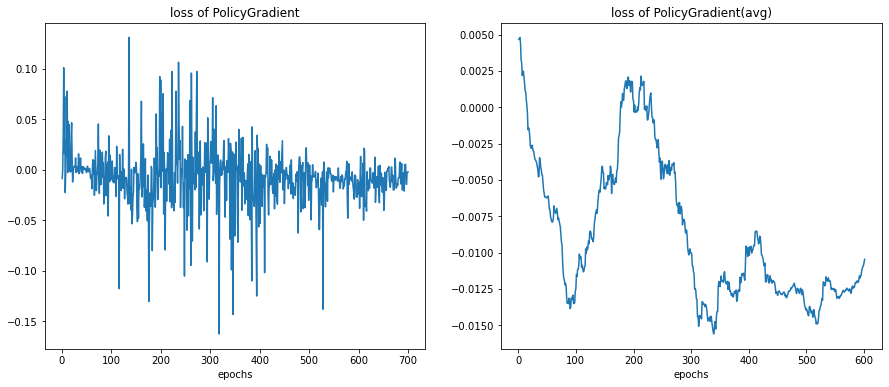

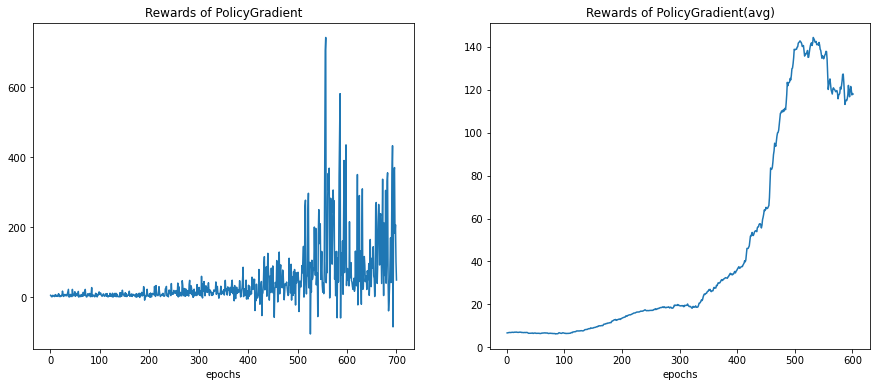

In [ ]:
plot_G('loss of PolicyGradient', loss_total)
plot_G('Rewards of PolicyGradient', rew)